# Performance of Sets and Dictionaries

In [1]:
# Run this cell first!

import time
import random
from matplotlib import pyplot as plt

### Feel the *slowness*

In the previous notebook you *saw* the slowness of lists. As a list gets bigger it takes longer and longer to perform membership tests.

But you can *feel* the slowness too. Compare how long it takes to run the next two cells.

In [2]:
# SMALL list membership tests

small_list = list(range(10)) # ten element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in small_list

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 1.0390000000000121 milliseconds


In [3]:
# BIG list membership tests

big_list = list(range(100000)) # 100K element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in big_list

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 5260.892 milliseconds


That was **boring** wasn't it?

Waiting for code to execute (even if it only takes a few seconds) has been proven to be the most boring activity in the world. And when code is slow on a self driving car it can be downright dangerous.

Luckily, we can often speed things up **a lot** by choosing the right data structure.

### Feel the *speed*

The code cells below do the EXACT same thing as the code cells above except they use `set` instead of `list` in that first line.

In [4]:
# SMALL set membership tests

small_set = set(range(10)) # ten element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in small_set

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 0.974999999999504 milliseconds


### Drum roll please!

![drum roll](drum-roll.gif)

Remember how *painfully slow* the big list was? Well hold on to your seat!

In [5]:
# BIG set membership tests

big_set = set(range(100000)) # 100K element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in big_set

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 0.7109999999999062 milliseconds


![fast car](fast-sport-car-1466168667pxr.jpg)

### Stepping back

Sorry for all that repeated code. Sometimes I just get so excited when I'm programming that I ignore the voice that says "get your act together! Make that a function and stop repeating yourself!"

Now I'm going to listen to that voice, clean up this code, and show you just how fast sets are.

In [6]:
def test_data_structure_speed(data_structure_type, size, N=50):
    if data_structure_type != dict:
        data_structure = data_structure_type(range(size))
    else:
        data_structure = {num: "value" for num in range(size)}
    nonexistent_element = -1
    
    start = time.clock()
    for _ in range(N):
        nonexistent_element in data_structure
    end = time.clock()
    
    millis = (end-start) * 1000
    return millis    

In [7]:
# set test
test_data_structure_speed(set, 100000, N=1000)

0.06699999999959516

In [8]:
# list test
test_data_structure_speed(list, 100000, N=1000)

1212.0669999999993

In [9]:
# dictionary test
test_data_structure_speed(dict, 100000, N=1000)

0.053999999998666226

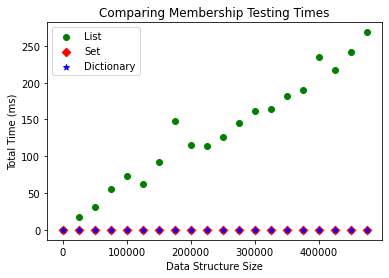

In [10]:
sizes = list(range(0, 500000, 25000))
list_speeds = [test_data_structure_speed(list, size) for size in sizes]
set_speeds  = [test_data_structure_speed(set,  size) for size in sizes]
dict_speeds = [test_data_structure_speed(dict, size) for size in sizes]

plt.scatter(sizes, list_speeds, c='g', marker="o") #green circle
plt.scatter(sizes, set_speeds,  c='r', marker="D") #red diamond
plt.scatter(sizes, dict_speeds, c='b', marker="*") #blue star

plt.xlabel("Data Structure Size")
plt.ylabel("Total Time (ms)")
plt.legend(["List", "Set", "Dictionary"])
plt.title("Comparing Membership Testing Times")
plt.show()

As you can see, the performance of sets and dictionaries does not depend on the size of the set / dictionary and membership tests are consistently **fast**. Fast is good.